# HR Analytics

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset 

In [4]:
df=pd.read_csv(r"C:\Users\Harshitha\Desktop\Data Trained\Projects\HR-Employee-Attrition.csv")

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.shape

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
df['Attrition'].value_counts()  #check the value count of target variable.

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:>

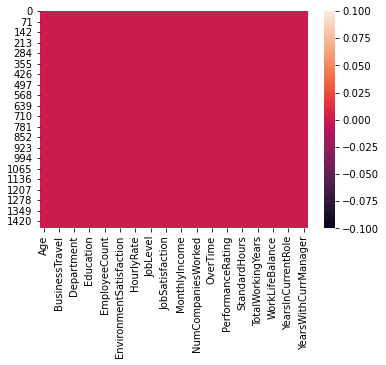

In [16]:
# Checking visualization through heatmap for null values
sns.heatmap(df.isnull())

## EDA

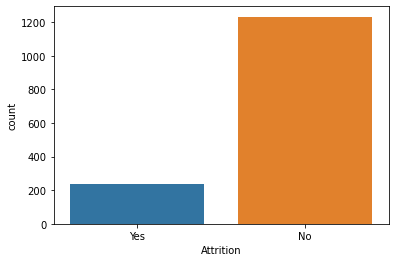

In [21]:
# Countplot Display distribution of data across all level of category
sns.countplot(x='Attrition',data=df);
plt.show()

just by observing countplot, the attrition has almost 18% of Employee retention rate

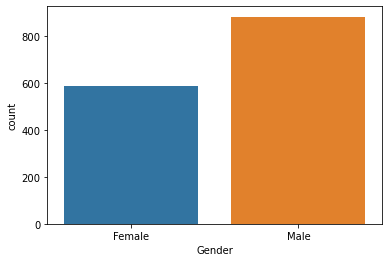

In [31]:
sns.countplot(df['Gender'])
plt.show()

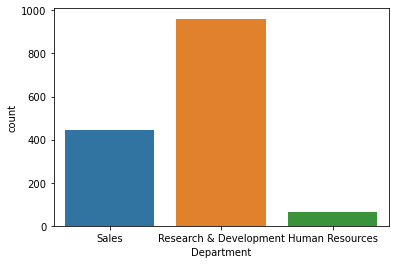

In [33]:
sns.countplot(df['Department'])
plt.show()

<AxesSubplot:xlabel='JobRole', ylabel='count'>

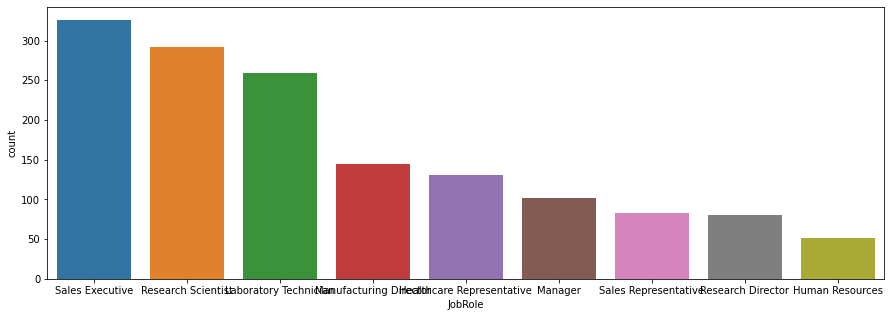

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(df['JobRole'])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

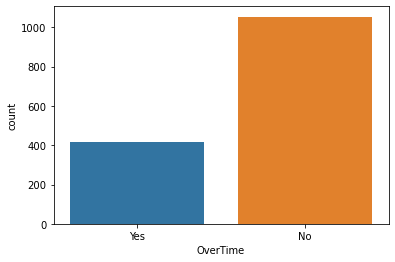

In [37]:
sns.countplot(df['OverTime'])

<AxesSubplot:xlabel='Age', ylabel='count'>

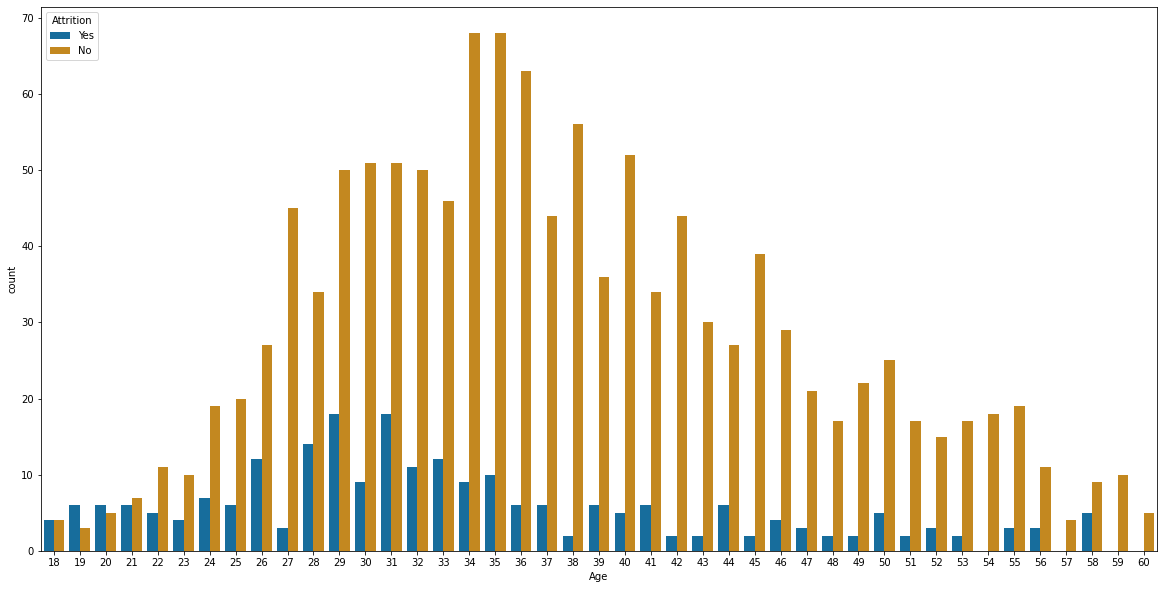

In [23]:
# Countplot Display distribution of data across Age vs Attrition.
plt.subplots(figsize=(20,10))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

<AxesSubplot:xlabel='MaritalStatus', ylabel='MonthlyIncome'>

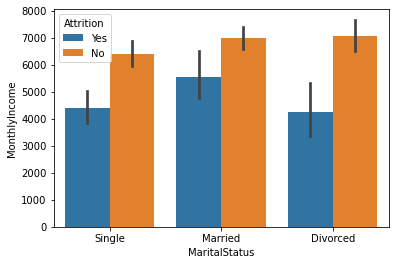

In [24]:
# Barplot Display distribution of data across all level of category
sns.barplot(x='MaritalStatus',y='MonthlyIncome',hue='Attrition',data=df)

Just by observing barplot,the monthly income is high for married person

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

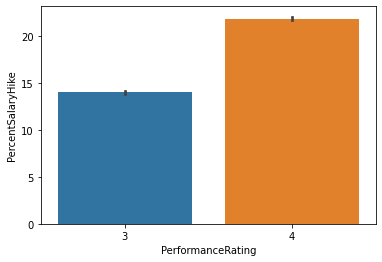

In [26]:
# Barplot Display distribution of data across all level of category
sns.barplot(x='PerformanceRating',y='PercentSalaryHike',data=df)

The percentage of salary hike is also high for employees whose performance rating is high

In [18]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


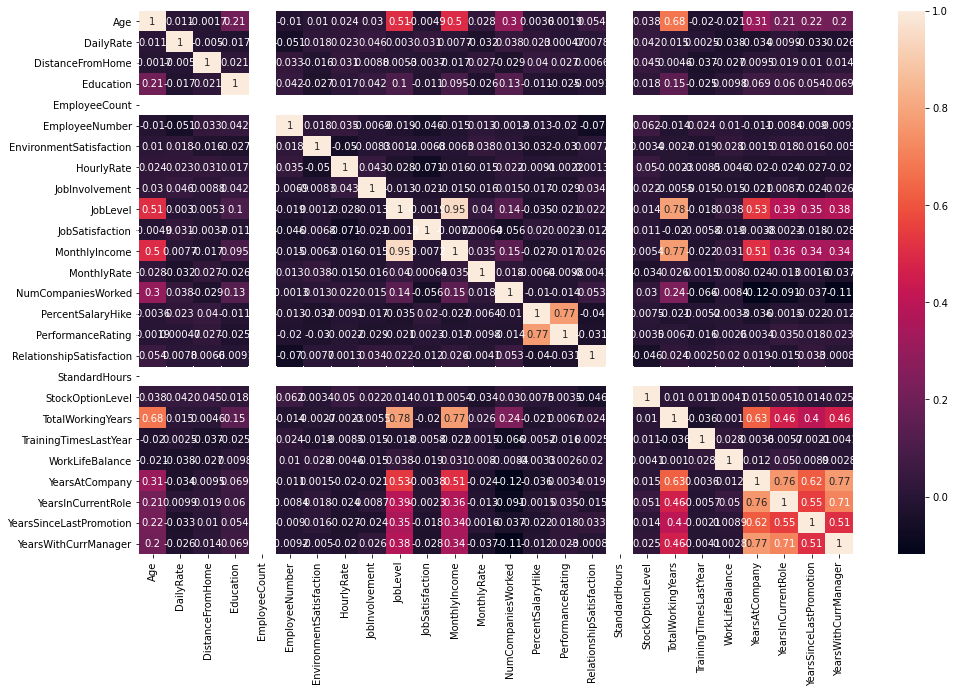

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [29]:
df.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

In [39]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

## Label Encoding

In [41]:
arr = ['Attrition', 'BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
le = LabelEncoder()

for i in arr:
    df[i] = le.fit_transform(df[i].astype(str))

In [42]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [44]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

## Outliers

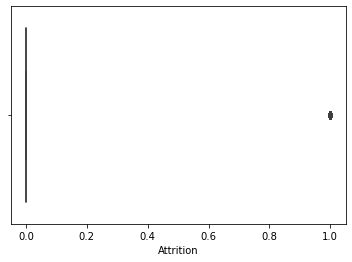

In [111]:
sns.boxplot(df['Attrition'])
plt.show()

<AxesSubplot:xlabel='DailyRate'>

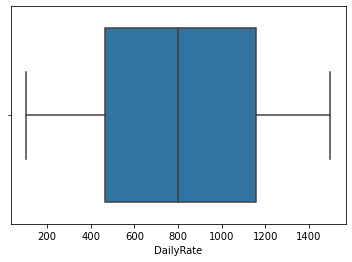

In [113]:
sns.boxplot(df['DailyRate'])

<AxesSubplot:xlabel='DistanceFromHome'>

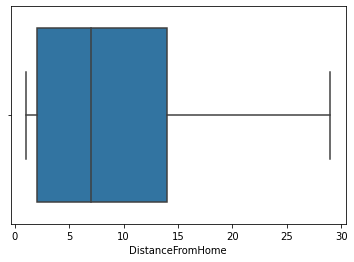

In [115]:
sns.boxplot(df['DistanceFromHome'])

<AxesSubplot:xlabel='JobLevel'>

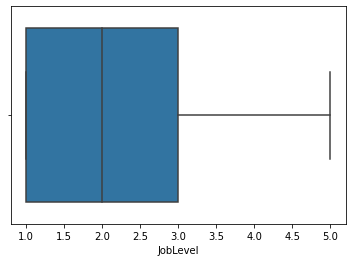

In [116]:
sns.boxplot(df['JobLevel'])

<AxesSubplot:xlabel='PerformanceRating'>

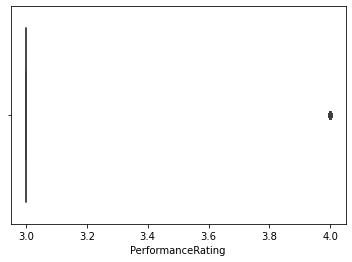

In [117]:
sns.boxplot(df['PerformanceRating'])

<AxesSubplot:xlabel='PercentSalaryHike'>

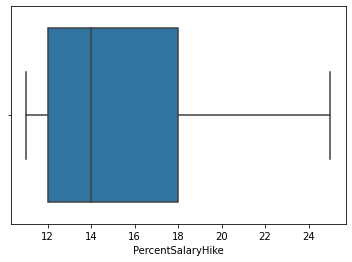

In [119]:
sns.boxplot(df['PercentSalaryHike'])

<AxesSubplot:xlabel='RelationshipSatisfaction'>

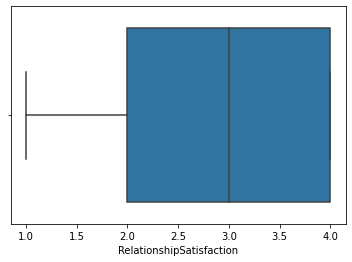

In [120]:
sns.boxplot(df['RelationshipSatisfaction'])

<AxesSubplot:xlabel='YearsInCurrentRole'>

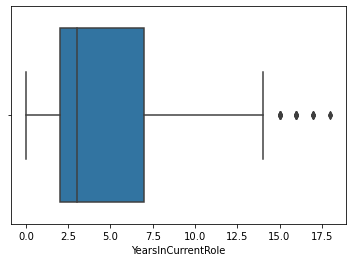

In [121]:
sns.boxplot(df['YearsInCurrentRole'])

<AxesSubplot:xlabel='YearsAtCompany'>

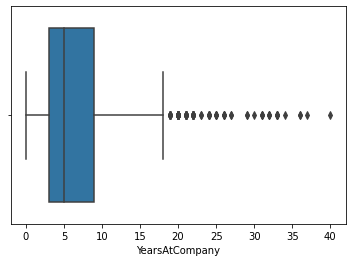

In [122]:
sns.boxplot(df['YearsAtCompany'])

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

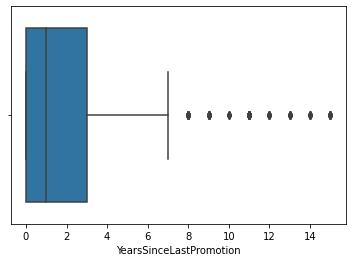

In [123]:
sns.boxplot(df['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsWithCurrManager'>

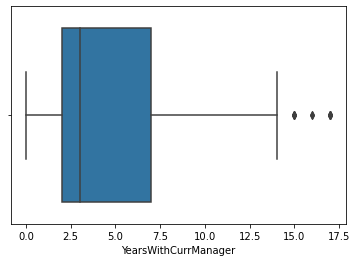

In [124]:
sns.boxplot(df['YearsWithCurrManager'])

## Skewness

In [46]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

In [55]:
# Assigning the input and output data
df_x = df.drop(columns = ['Attrition'])
y = df['Attrition']

In [57]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [58]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

In [59]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-1.701283,-0.660531,-1.224745,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,-1.699621,0.254625,0.816497,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,-1.696298,1.169781,0.816497,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,-1.694636,1.169781,-1.224745,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.691313,-1.575686,0.816497,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,1.721670,0.254625,0.816497,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.723332,1.169781,0.816497,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,1.726655,-0.660531,0.816497,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.728317,1.169781,0.816497,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [60]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [62]:
def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

## Classification model

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .7, random_state =18)

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8658892128279884
[[831  36]
 [102  60]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       867
           1       0.62      0.37      0.47       162

    accuracy                           0.87      1029
   macro avg       0.76      0.66      0.69      1029
weighted avg       0.85      0.87      0.85      1029



### Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.7677356656948494
[[739 128]
 [111  51]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       867
           1       0.28      0.31      0.30       162

    accuracy                           0.77      1029
   macro avg       0.58      0.58      0.58      1029
weighted avg       0.78      0.77      0.77      1029



### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8571428571428571
[[862   5]
 [142  20]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       867
           1       0.80      0.12      0.21       162

    accuracy                           0.86      1029
   macro avg       0.83      0.56      0.57      1029
weighted avg       0.85      0.86      0.81      1029



### SVC

In [68]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8454810495626822
[[866   1]
 [158   4]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       867
           1       0.80      0.02      0.05       162

    accuracy                           0.85      1029
   macro avg       0.82      0.51      0.48      1029
weighted avg       0.84      0.85      0.78      1029



## Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score


In [91]:
scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.8693877551020407


In [92]:
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.7795918367346938


In [93]:
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.8591836734693878


In [94]:
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.8605442176870748


Min difference in accuracy and cross validation score is for Random Forest model . so this is our best model

## Hyper parameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [105]:
GCV.best_params_

{'max_features': 'auto'}

In [106]:
mod=RandomForestClassifier(max_features='auto',random_state=18)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

88.77551020408163


In [107]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='auto',random_state=18).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

1.0

## Saving the model 

In [109]:
import joblib
joblib.dump(mod,"HR Analytics Project.pkl")

['HR Analytics Project.pkl']